# Spam Detection: Naive Bayes vs SVM

**Student Name:** _________________  
**Date:** _________________

In this project, you'll:
1. Load a spam email dataset
2. Train a Naive Bayes classifier
3. Train an SVM classifier
4. Compare the results

<small><i>Note</i>: This project was created with the assistance of AI</small>

---

## Step 1: Import Libraries and Load Data

In [20]:
# Import libraries
import numpy as np
import pandas as pd

# Set random seed for reproducibility
np.random.seed(42)

In [21]:
# Load the dataset
data = pd.read_csv('../data/spam_data.csv')

# Display first few rows
data.head()

,word_free,word_money,word_winner,word_click,word_urgent,num_exclamation,num_dollar,num_capitals,email_length,has_link,is_spam
0,0.116603,0.081405,0.248621,0.107026,0.084280,0.162809,0.042277,0.240659,101.836546,0.296066,0
1,0.150017,0.202468,0.071720,0.227412,0.228002,0.093779,0.123205,0.062907,90.571442,0.193681,0
2,0.009429,0.190923,0.094307,0.152571,0.272270,0.074788,0.123115,0.226665,130.369345,0.023094,0
3,0.085727,0.129830,0.205633,0.099737,0.016976,0.112176,0.283335,0.192520,98.526674,0.189685,0
4,0.050113,0.050286,0.011001,0.220921,0.199141,0.142389,0.253251,0.241701,96.637459,0.260481,0


## Step 2: Preprocessing the Data
* Clean the data
* Split the data into training and test sets.
* Feature Scaling

In [22]:
data.isna().sum()

word_free          0
word_money         0
word_winner        0
word_click         0
word_urgent        0
num_exclamation    0
num_dollar         0
num_capitals       0
email_length       0
has_link           0
is_spam            0
dtype: int64

In [23]:
data.describe()

,word_free,word_money,word_winner,word_click,word_urgent,num_exclamation,num_dollar,num_capitals,email_length,has_link,is_spam
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.324655,0.437897,0.444648,0.327555,0.448487,0.562027,0.569642,0.329246,83.687840,0.321640,0.400000
std,0.276739,0.416377,0.429590,0.266253,0.429160,0.582346,0.595018,0.276511,32.841447,0.265409,0.490143
min,0.001814,0.000009,0.000003,0.001728,0.000040,0.000068,0.000179,0.000470,20.271028,0.000334,0.000000
25%,0.103749,0.130491,0.133985,0.123341,0.125848,0.129044,0.118774,0.119615,58.649876,0.125624,0.000000
50%,0.232671,0.256609,0.246666,0.241799,0.250986,0.260757,0.247139,0.235900,81.591240,0.235755,0.000000
75%,0.492580,0.715676,0.698216,0.515019,0.756558,0.991942,1.029110,0.499580,105.938149,0.471724,1.000000
max,0.997347,1.498341,1.491796,0.998332,1.497016,1.998248,1.990861,0.999604,149.946068,0.995018,1.000000


There doesn't seem to be any missing data or any data out of whack, other than email length not being normalized. (which I will do below). 

In [24]:
email_max = data["email_length"].max()
email_min = data["email_length"].min()

data["email_length"] = (data["email_length"] - email_min) / (email_max - email_min)
data.describe()

,word_free,word_money,word_winner,word_click,word_urgent,num_exclamation,num_dollar,num_capitals,email_length,has_link,is_spam
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.324655,0.437897,0.444648,0.327555,0.448487,0.562027,0.569642,0.329246,0.489044,0.321640,0.400000
std,0.276739,0.416377,0.429590,0.266253,0.429160,0.582346,0.595018,0.276511,0.253260,0.265409,0.490143
min,0.001814,0.000009,0.000003,0.001728,0.000040,0.000068,0.000179,0.000470,0.000000,0.000334,0.000000
25%,0.103749,0.130491,0.133985,0.123341,0.125848,0.129044,0.118774,0.119615,0.295962,0.125624,0.000000
50%,0.232671,0.256609,0.246666,0.241799,0.250986,0.260757,0.247139,0.235900,0.472876,0.235755,0.000000
75%,0.492580,0.715676,0.698216,0.515019,0.756558,0.991942,1.029110,0.499580,0.660629,0.471724,1.000000
max,0.997347,1.498341,1.491796,0.998332,1.497016,1.998248,1.990861,0.999604,1.000000,0.995018,1.000000


In [25]:
y = data["is_spam"]
data.drop(columns=["is_spam"], inplace=True)
X = data

In [26]:
# Split the data using a random state of 42 for reproducibility
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

## Step 3: Train Naive Bayes Classifier

In [27]:
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
nb_model

,"priors priors: array-like of shape (n_classes,), default=NonePrior probabilities of the classes. If specified, the priors are notadjusted according to the data.",None
,"var_smoothing var_smoothing: float, default=1e-9Portion of the largest variance of all features that is added tovariances for calculation stability... versionadded:: 0.20",1e-09


In [28]:
y_pred_nb = nb_model.predict(X_test)

Display your confusion matrix and your classification report.

In [29]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

print(confusion_matrix(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))

[[113   0]
 [  0  87]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       113
           1       1.00      1.00      1.00        87

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



## Step 4: Train k-Nearest Neighbors Classifier

In [42]:
from sklearn.neighbors import KNeighborsClassifier

k = 5

knn_class = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
knn_class.fit(X, y)

,"n_neighbors n_neighbors: int, default=5Number of neighbors to use by default for :meth:`kneighbors` queries.",5
,"weights weights: {'uniform', 'distance'}, callable or None, default='uniform'Weight function used in prediction. Possible values:- 'uniform' : uniform weights. All points in each neighborhood are weighted equally.- 'distance' : weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.- [callable] : a user-defined function which accepts an array of distances, and returns an array of the same shape containing the weights.Refer to the example entitled:ref:`sphx_glr_auto_examples_neighbors_plot_classification.py`showing the impact of the `weights` parameter on the decisionboundary.",'uniform'
,"algorithm algorithm: {'auto', 'ball_tree', 'kd_tree', 'brute'}, default='auto'Algorithm used to compute the nearest neighbors:- 'ball_tree' will use :class:`BallTree`- 'kd_tree' will use :class:`KDTree`- 'brute' will use a brute-force search.- 'auto' will attempt to decide the most appropriate algorithm based on the values passed to :meth:`fit` method.Note: fitting on sparse input will override the setting ofthis parameter, using brute force.",'auto'
,"leaf_size leaf_size: int, default=30Leaf size passed to BallTree or KDTree. This can affect thespeed of the construction and query, as well as the memoryrequired to store the tree. The optimal value depends on thenature of the problem.",30
,"p p: float, default=2Power parameter for the Minkowski metric. When p = 1, this is equivalentto using manhattan_distance (l1), and euclidean_distance (l2) for p = 2.For arbitrary p, minkowski_distance (l_p) is used. This parameter is expectedto be positive.",2
,"metric metric: str or callable, default='minkowski'Metric to use for distance computation. Default is ""minkowski"", whichresults in the standard Euclidean distance when p = 2. See thedocumentation of `scipy.spatial.distance`_ andthe metrics listed in:class:`~sklearn.metrics.pairwise.distance_metrics` for valid metricvalues.If metric is ""precomputed"", X is assumed to be a distance matrix andmust be square during fit. X may be a :term:`sparse graph`, in whichcase only ""nonzero"" elements may be considered neighbors.If metric is a callable function, it takes two arrays representing 1Dvectors as inputs and must return one value indicating the distancebetween those vectors. This works for Scipy's metrics, but is lessefficient than passing the metric name as a string.",'euclidean'
,"metric_params metric_params: dict, default=NoneAdditional keyword arguments for the metric function.",None
,"n_jobs n_jobs: int, default=NoneThe number of parallel jobs to run for neighbors search.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details.Doesn't affect :meth:`fit` method.",None


In [43]:
y_pred_knn = knn_class.predict(X_test)

Display your confusion matrix and classification report.

In [44]:
print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

[[113   0]
 [  0  87]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       113
           1       1.00      1.00      1.00        87

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



## Step 5: Train SVM Classifier

In [33]:
from sklearn.svm import LinearSVC

svm_class = LinearSVC(C=1, loss="hinge")
svm_class.fit(X, y)

,"penalty penalty: {'l1', 'l2'}, default='l2'Specifies the norm used in the penalization. The 'l2'penalty is the standard used in SVC. The 'l1' leads to ``coef_``vectors that are sparse.",'l2'
,"loss loss: {'hinge', 'squared_hinge'}, default='squared_hinge'Specifies the loss function. 'hinge' is the standard SVM loss(used e.g. by the SVC class) while 'squared_hinge' is thesquare of the hinge loss. The combination of ``penalty='l1'``and ``loss='hinge'`` is not supported.",'hinge'
,"dual dual: ""auto"" or bool, default=""auto""Select the algorithm to either solve the dual or primaloptimization problem. Prefer dual=False when n_samples > n_features.`dual=""auto""` will choose the value of the parameter automatically,based on the values of `n_samples`, `n_features`, `loss`, `multi_class`and `penalty`. If `n_samples` < `n_features` and optimizer supportschosen `loss`, `multi_class` and `penalty`, then dual will be set to True,otherwise it will be set to False... versionchanged:: 1.3 The `""auto""` option is added in version 1.3 and will be the default in version 1.5.",'auto'
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"C C: float, default=1.0Regularization parameter. The strength of the regularization isinversely proportional to C. Must be strictly positive.For an intuitive visualization of the effects of scalingthe regularization parameter C, see:ref:`sphx_glr_auto_examples_svm_plot_svm_scale_c.py`.",1
,"multi_class multi_class: {'ovr', 'crammer_singer'}, default='ovr'Determines the multi-class strategy if `y` contains more thantwo classes.``""ovr""`` trains n_classes one-vs-rest classifiers, while``""crammer_singer""`` optimizes a joint objective over all classes.While `crammer_singer` is interesting from a theoretical perspectiveas it is consistent, it is seldom used in practice as it rarely leadsto better accuracy and is more expensive to compute.If ``""crammer_singer""`` is chosen, the options loss, penalty and dualwill be ignored.",'ovr'
,"fit_intercept fit_intercept: bool, default=TrueWhether or not to fit an intercept. If set to True, the feature vectoris extended to include an intercept term: `[x_1, ..., x_n, 1]`, where1 corresponds to the intercept. If set to False, no intercept will beused in calculations (i.e. data is expected to be already centered).",True
,"intercept_scaling intercept_scaling: float, default=1.0When `fit_intercept` is True, the instance vector x becomes ``[x_1,..., x_n, intercept_scaling]``, i.e. a ""synthetic"" feature with aconstant value equal to `intercept_scaling` is appended to the instancevector. The intercept becomes intercept_scaling * synthetic featureweight. Note that liblinear internally penalizes the intercept,treating it like any other term in the feature vector. To reduce theimpact of the regularization on the intercept, the `intercept_scaling`parameter can be set to a value greater than 1; the higher the value of`intercept_scaling`, the lower the impact of regularization on it.Then, the weights become `[w_x_1, ..., w_x_n,w_intercept*intercept_scaling]`, where `w_x_1, ..., w_x_n` representthe feature weights and the intercept weight is scaled by`intercept_scaling`. This scaling allows the intercept term to have adifferent regularization behavior compared to the other features.",1
,"class_weight class_weight: dict or 'balanced', default=NoneSet the parameter C of class i to ``class_weight[i]*C`` forSVC. If not given, all classes are supposed to haveweight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.",None
,"verbose verbose: int, default=0Enable verbose output. Note that this setting takes advantage of aper-process runtime setting in liblinear that, if enabled, may not workproperly in a multithreaded context.",0
,"random_state random_state: int, RandomState instance or None, default=NoneControls the pseudo random number 

In [34]:
y_pred_svm = svm_class.predict(X_test)

Display your confusion matrix and your classification report.

In [35]:
print(confusion_matrix(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

[[113   0]
 [  0  87]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       113
           1       1.00      1.00      1.00        87

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



## Step 6: Compare the Models
* Create graphs that compare model results
* Make calculations to compare model results

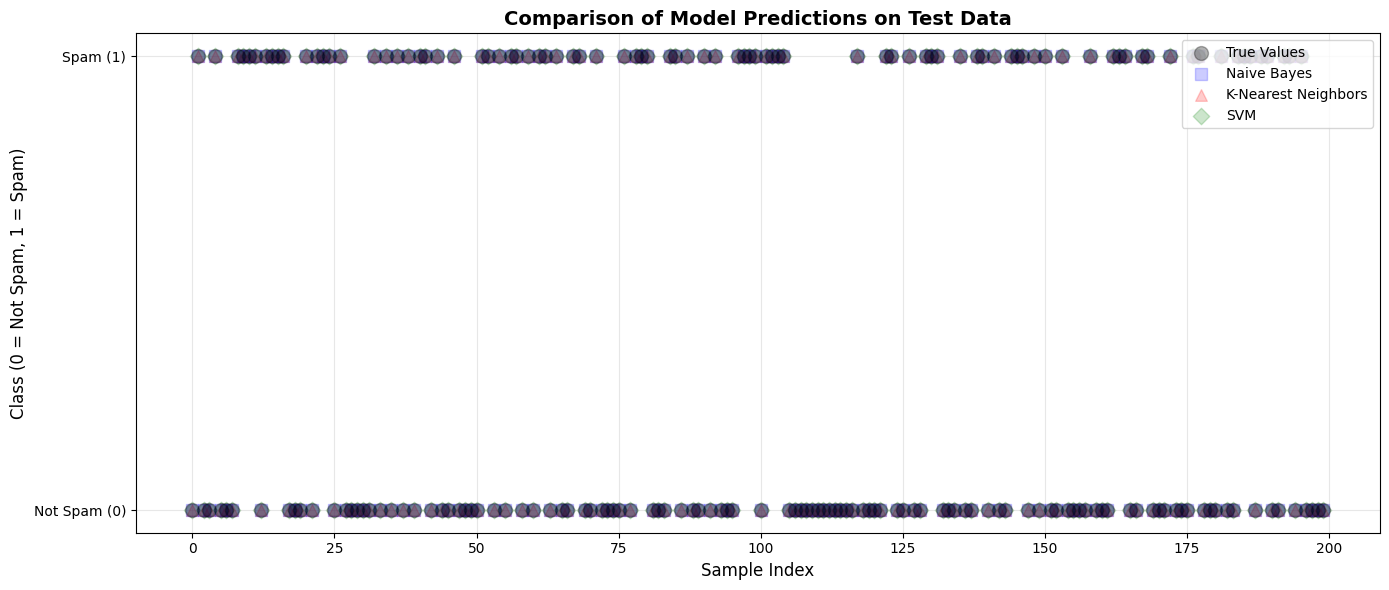

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))

x_indices = range(len(y_test))

plt.scatter(x_indices, y_test, color='black', marker='o', s=100, alpha=0.3, label='True Values', zorder=4)
plt.scatter(x_indices, y_pred_nb, color='blue', marker='s', s=70, alpha=0.2, label='Naive Bayes', zorder=3)
plt.scatter(x_indices, y_pred_knn, color='red', marker='^', s=70, alpha=0.2, label='K-Nearest Neighbors', zorder=2)
plt.scatter(x_indices, y_pred_svm, color='green', marker='D', s=70, alpha=0.2, label='SVM', zorder=1)

plt.xlabel('Sample Index', fontsize=12)
plt.ylabel('Class (0 = Not Spam, 1 = Spam)', fontsize=12)
plt.title('Comparison of Model Predictions on Test Data', fontsize=14, fontweight='bold')
plt.legend(loc='upper right', fontsize=10)
plt.yticks([0, 1], ['Not Spam (0)', 'Spam (1)'])
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

Discuss the results of your comparison.

All of the models are perfect, so it doesn't really matter. 

As can be seen in the graph above (with a very low opacity) that all the models perfectly overlap. 

---

## Step 7: Answer Discussion Questions

Based on your results, answer the following questions:

### Question 1: Which model performed better overall? Why do you think so?

**Your Answer:**

All of them were perfect, so it doesn't matter. 

---

### Question 2: What is the difference between accuracy and precision? Which is more important for spam detection?

**Your Answer:**

Accuracy is the number of correct predictions, and precision is true positives over true positives + false positives. For spam, it's better to be precise so you minimize the number of items that are removed by the filter. But it also depends on how aggressive you want to be with your detection/removal. 

---

### Question 3: When would you choose Naive Bayes over kNN or SVM in a real-world application?

**Your Answer:**

The algorithm is cheaper and faster over being more correct (and more generalizable), so if there were many data points, many categories, and a need to compute quickly, I would go for NB. 

---

### Question 4: What are the key assumptions of Naive Bayes? Do you think they hold true for this spam detection problem?

**Your Answer:**

The primary assumption is that the data columns are independent, which is usually not true for real-world data (such as temperature not being independent of whether or not the sun is out). Given out dataset, things seem generally independent (urgent, winner, click, money) and spam would have a bunch of them. 

Now, some of them might not be relevant, which is something NB doesn't handle very well, but given the importance and volume they need to go through, it seems like a good model. 

---

### Question 5: How did you determine your value for $k$ in the kNN model?

**Your Answer:**

The square root of the number of observations is ~31, which happens to be a prime number, so that is the number I chose. I tested as low as 5, which also worked perfectly for our dataset.

---

## Summary

In this project, you:
- ✅ Loaded and split a spam detection dataset
- ✅ Trained a Naive Bayes classifier
- ✅ Trained an SVM classifier  
- ✅ Compared both models using multiple metrics
- ✅ Analyzed the results

**Key Takeaways:**
1. Different algorithms can produce different results on the same data
2. Multiple metrics (accuracy, precision, recall) give a complete picture
3. Both Naive Bayes and SVM are effective for classification tasks
4. The choice of algorithm depends on the specific requirements of your problem